In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
file_loc = ('/Users/juhwikim/Desktop/MSDS/422 Machine Learning/HMEQ_Loss.csv')

df = pd.read_csv(file_loc)

## Dataframe Overview

In [3]:
df.shape

(5960, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET_BAD_FLAG  5960 non-null   int64  
 1   TARGET_LOSS_AMT  1189 non-null   float64
 2   LOAN             5960 non-null   int64  
 3   MORTDUE          5442 non-null   float64
 4   VALUE            5848 non-null   float64
 5   REASON           5708 non-null   object 
 6   JOB              5681 non-null   object 
 7   YOJ              5445 non-null   float64
 8   DEROG            5252 non-null   float64
 9   DELINQ           5380 non-null   float64
 10  CLAGE            5652 non-null   float64
 11  NINQ             5450 non-null   float64
 12  CLNO             5738 non-null   float64
 13  DEBTINC          4693 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 652.0+ KB


In [5]:
df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [6]:
df.tail()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
5955,0,NaN,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,NaN,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,NaN,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,NaN,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882
5959,0,NaN,89900,48811.0,88934.0,DebtCon,Other,15.0,0.0,0.0,219.601002,0.0,16.0,34.571519


In [7]:
description= df.describe()
description

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,1189.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,13414.576955,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,10839.455965,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,224.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,5639.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,11003.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,17634.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,78987.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [8]:
df.dtypes

TARGET_BAD_FLAG      int64
TARGET_LOSS_AMT    float64
LOAN                 int64
MORTDUE            float64
VALUE              float64
REASON              object
JOB                 object
YOJ                float64
DEROG              float64
DELINQ             float64
CLAGE              float64
NINQ               float64
CLNO               float64
DEBTINC            float64
dtype: object

### Target Variables

In [9]:
df.TARGET_BAD_FLAG.value_counts()

0    4771
1    1189
Name: TARGET_BAD_FLAG, dtype: int64

In [10]:
df.TARGET_LOSS_AMT.isna().sum()

4771

* All NaN values in TARGET_LOSS_AMT indicate the borrower did not have a bad flag; therefore, I will need to imput NaN to 0. 

In [11]:
Good_df = df[df["TARGET_BAD_FLAG"] == 0]
Good_df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
4,0,NaN,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
13,0,NaN,2000,64536.0,87400.0,NaN,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0,NaN
19,0,NaN,2300,102370.0,120953.0,HomeImp,Office,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503
26,0,NaN,2400,98449.0,117195.0,HomeImp,Office,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827
29,0,NaN,2500,7229.0,44516.0,HomeImp,Self,NaN,0.0,0.0,208.000000,0.0,12.0,NaN


In [12]:
Good_df.describe()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,4771.0,0.0,4771.000000,4359.000000,4764.000000,4321.000000,4150.000000,4263.000000,4541.000000,4336.000000,4602.000000,4290.000000
mean,0.0,NaN,19028.107315,74829.249055,102595.921018,9.154941,0.134217,0.245133,187.002355,1.032749,21.317036,33.253129
std,0.0,NaN,11115.758554,43584.993587,52748.392952,7.676033,0.514490,0.674124,84.465217,1.531322,9.682601,6.947482
min,0.0,NaN,1700.000000,2619.000000,8000.000000,0.000000,0.000000,0.000000,0.486711,0.000000,0.000000,0.720295
25%,0.0,NaN,11700.000000,47484.000000,67297.750000,3.000000,0.000000,0.000000,120.219885,0.000000,15.000000,28.905127
50%,0.0,NaN,16900.000000,66839.000000,90659.000000,7.000000,0.000000,0.000000,180.415787,1.000000,20.000000,34.541671
75%,0.0,NaN,23500.000000,93068.000000,120615.500000,13.000000,0.000000,0.000000,240.157802,2.000000,26.000000,38.739077
max,0.0,NaN,89900.000000,371003.000000,471827.000000,36.000000,6.000000,5.000000,649.747104,11.000000,56.000000,45.569843


In [13]:
Bad_df = df[df["TARGET_BAD_FLAG"] == 1]
Bad_df.head()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,641.0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1109.0,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,767.0,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1425.0,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,335.0,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614


In [14]:
Bad_df.describe()

,TARGET_BAD_FLAG,TARGET_LOSS_AMT,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,1189.0,1189.000000,1189.000000,1083.000000,1084.000000,1124.000000,1102.000000,1117.000000,1111.000000,1114.000000,1136.000000,403.000000
mean,1.0,13414.576955,16922.119428,69460.452973,98172.846227,8.027802,0.707804,1.229185,150.190183,1.782765,21.211268,39.387645
std,0.0,10839.455965,11418.455152,47588.194467,74339.822506,7.100735,1.468381,1.902961,84.952286,2.246976,11.812981,17.723586
min,1.0,224.000000,1100.000000,2063.000000,8800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,1.0,5639.000000,9200.000000,39946.500000,59368.250000,2.000000,0.000000,0.000000,96.033333,0.000000,13.000000,32.383046
50%,1.0,11003.000000,14900.000000,60279.000000,82000.000000,6.000000,0.000000,0.000000,132.866667,1.000000,20.000000,38.079762
75%,1.0,17634.000000,21700.000000,85864.500000,116000.000000,12.000000,1.000000,2.000000,193.283333,3.000000,28.000000,43.285990
max,1.0,78987.000000,77400.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


### Input Variables

In [15]:
dt = df.dtypes

objList = []
numList = []

for i in dt.index:
    if i in(["TARGET_BAD_FLAG","TARGET_LOSS_AMT"]): continue
    if dt[i] in (["float64","int64"]): numList.append(i)
    if dt[i] in (["object"]): objList.append(i)


In [16]:
for i in objList :
    print( i )
    print( df[i].unique() )
    g = df.groupby( i )
    print( g[i].count() )
    print( "MOST COMMON = ", df[i].mode()[0] )
    print( "MISSING = ", df[i].isna().sum() )  

REASON
['HomeImp' nan 'DebtCon']
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
MOST COMMON =  DebtCon
MISSING =  252
JOB
['Other' nan 'Office' 'Sales' 'Mgr' 'ProfExe' 'Self']
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
MOST COMMON =  Other
MISSING =  279


In [18]:
for i in objList :
    print(" Class = ", i )
    g = df.groupby( i )
    #print(g.head())
    print( g[i].count() )
    x = g["TARGET_BAD_FLAG"].mean()
    print( "Bad Flag", x )
    print( " ................. ")
    x = g["TARGET_LOSS_AMT"].mean()
    print( "Loss Amount", x )
    print(" ===============\n\n\n ")

 Class =  REASON
REASON
DebtCon    3928
HomeImp    1780
Name: REASON, dtype: int64
Bad Flag REASON
DebtCon    0.189664
HomeImp    0.222472
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount REASON
DebtCon    16005.163758
HomeImp     8388.090909
Name: TARGET_LOSS_AMT, dtype: float64


 
 Class =  JOB
JOB
Mgr         767
Office      948
Other      2388
ProfExe    1276
Sales       109
Self        193
Name: JOB, dtype: int64
Bad Flag JOB
Mgr        0.233377
Office     0.131857
Other      0.231993
ProfExe    0.166144
Sales      0.348624
Self       0.300518
Name: TARGET_BAD_FLAG, dtype: float64
 ................. 
Loss Amount JOB
Mgr        14141.536313
Office     13475.304000
Other      11570.102888
ProfExe    14660.966981
Sales      16421.447368
Self       22232.362069
Name: TARGET_LOSS_AMT, dtype: float64


 


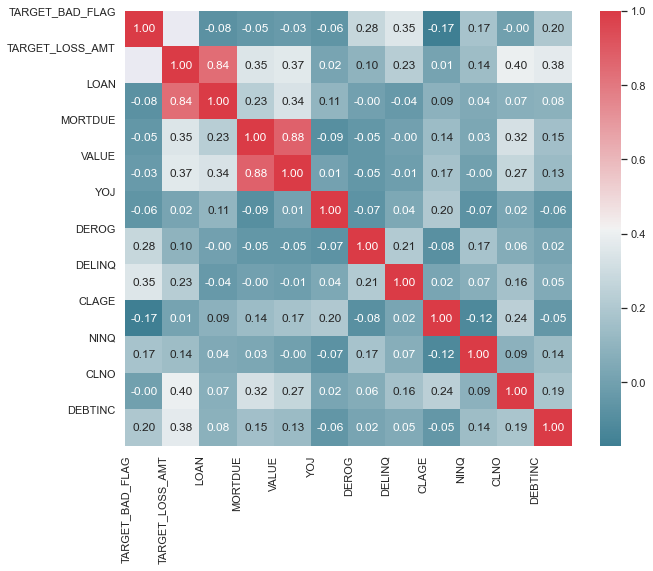

In [19]:
#Create Correlation matrix
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

## Data Preparation

### Missing Values Evaluation

In [20]:
MissingData=df.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData

,Variables,Missing Values
0,TARGET_BAD_FLAG,0
1,TARGET_LOSS_AMT,4771
2,LOAN,0
3,MORTDUE,518
4,VALUE,112
5,REASON,252
6,JOB,279
7,YOJ,515
8,DEROG,708
9,DELINQ,580


<AxesSubplot:>

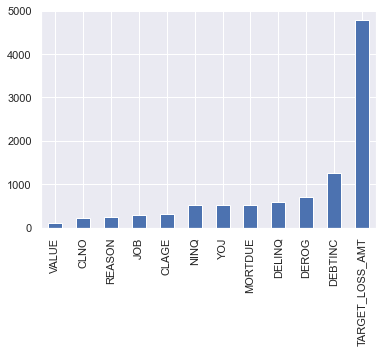

In [21]:
#Graph of fields with missing values - sorted by number of missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

### Overview Visualization

In [23]:
numList

['LOAN',
 'MORTDUE',
 'VALUE',
 'YOJ',
 'DEROG',
 'DELINQ',
 'CLAGE',
 'NINQ',
 'CLNO',
 'DEBTINC']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET_BAD_FLAG', ylabel='Density'>

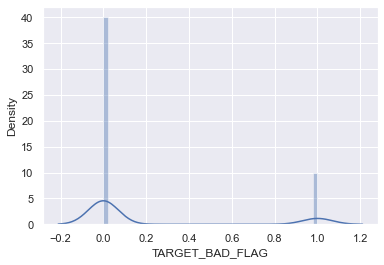

In [50]:
sns.distplot(df['TARGET_BAD_FLAG'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TARGET_LOSS_AMT', ylabel='Density'>

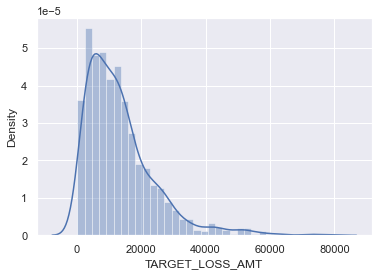

In [30]:
sns.distplot(df['TARGET_LOSS_AMT'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LOAN', ylabel='Density'>

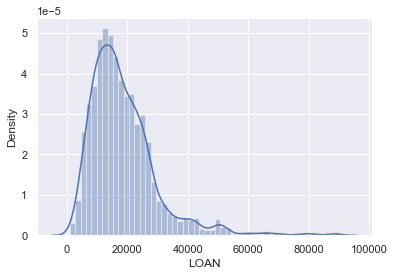

In [39]:
sns.distplot(df['LOAN'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MORTDUE', ylabel='Density'>

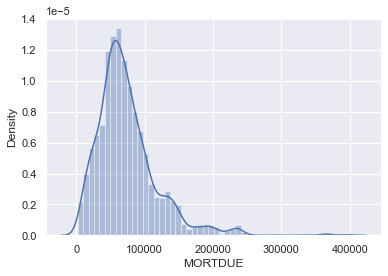

In [40]:
sns.distplot(df['MORTDUE'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VALUE', ylabel='Density'>

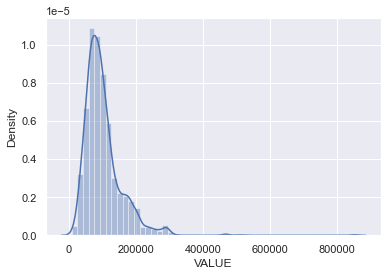

In [41]:
sns.distplot(df['VALUE'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YOJ', ylabel='Density'>

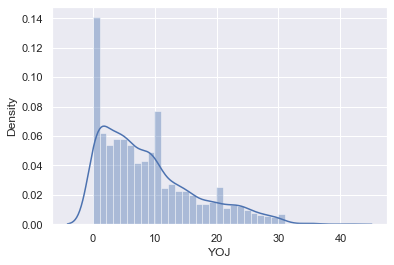

In [42]:
sns.distplot(df['YOJ'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DEROG', ylabel='Density'>

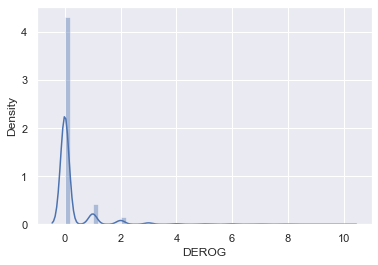

In [43]:
sns.distplot(df['DEROG'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DELINQ', ylabel='Density'>

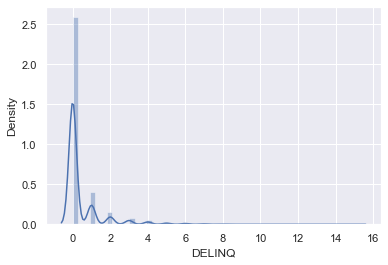

In [44]:
sns.distplot(df['DELINQ'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLAGE', ylabel='Density'>

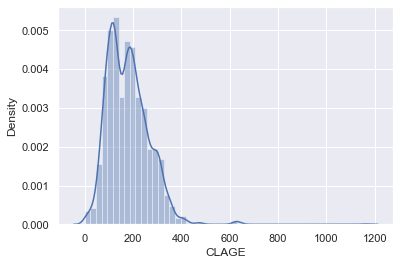

In [51]:
sns.distplot(df['CLAGE'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NINQ', ylabel='Density'>

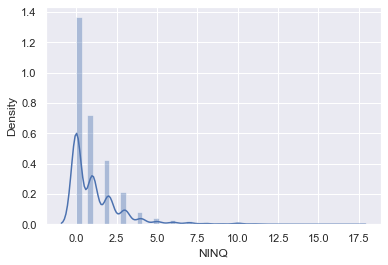

In [52]:
sns.distplot(df['NINQ'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CLNO', ylabel='Density'>

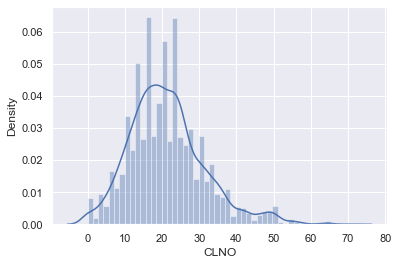

In [53]:
sns.distplot(df['CLNO'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DEBTINC', ylabel='Density'>

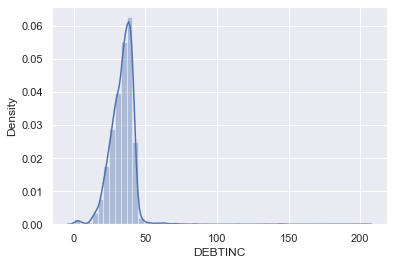

In [54]:
sns.distplot(df['DEBTINC'])

### Missing Values in Target Variables:

In [55]:
df['IMP_TARGET_LOSS_AMT'] = df['TARGET_LOSS_AMT'].fillna(0)

In [56]:
df['IMP_TARGET_LOSS_AMT'].isnull().sum()

0

### Missing Values in Categorical/Object Variables:

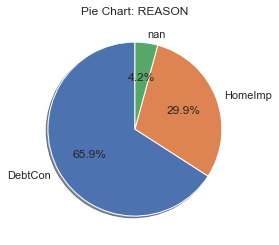

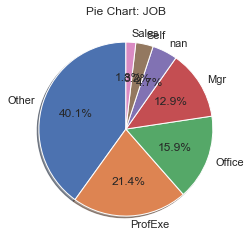

In [57]:
for i in objList :
    x = df[ i ].value_counts(dropna=False)
    #print( x )
    theLabels = x.axes[0].tolist()
    #print( theLabels )
    theSlices = list(x)
    #print( theSlices )
    plt.pie( theSlices, labels=theLabels, startangle = 90, shadow=True, autopct="%1.1f%%")
    plt.title("Pie Chart: " + i)
    plt.show()

* While large portion of the reason for taking the loan is to consolidate debt, there could be other reasons beside debt consolidation or home improvement to take the loan; therefore, imputing NaN with mode may not truly reflect the data when there were only two options (DebtCons vs. HomeImp). Therefore, for Reason, I will impute NaN with "Missing".
* For Jobs, the large portion of the jobs fall under "Other". Since Other is overarching word, I will impute NaN using Mode which will transform NaN values into "Other".

In [58]:
for i in objList :
    if df[i].isna().sum() == 0 : continue
    NAME = "IMP_"+i
    print( NAME )
    df[NAME] = df[i]

IMP_REASON
IMP_JOB


In [59]:
df['IMP_REASON'] = df['REASON'].fillna("Missing")
df.IMP_REASON.value_counts()

DebtCon    3928
HomeImp    1780
Missing     252
Name: IMP_REASON, dtype: int64

In [60]:
df['IMP_JOB'] = df['JOB'].fillna(df['JOB'].mode()[0] )
df.IMP_JOB.value_counts()

Other      2667
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: IMP_JOB, dtype: int64

### One Hot Encoding Transforming Categorical Variables into Numerical Variables

In [61]:
df["REASON_DEBTCON"] = (df.IMP_REASON.isin( ["DebtCon"] ) + 0 )
df["REASON_HOMEIMP"] = (df.IMP_REASON.isin( ["HomeImp"] ) + 0 )
df["REASON_MISSING"] = (df.IMP_REASON.isin( ["Missing"] ) + 0 )

In [62]:
df["JOB_Mgr"] = (df.IMP_JOB.isin( ["Mgr"] ) + 0 )
df["JOB_Office"] = (df.IMP_JOB.isin( ["Office"] ) + 0 )
df["JOB_Other"] = (df.IMP_JOB.isin( ["Other"] ) + 0 )
df["JOB_ProfExe"] = (df.IMP_JOB.isin( ["ProfExe"] ) + 0 )
df["JOB_Sales"] = (df.IMP_JOB.isin( ["Sales"] ) + 0 )
df["JOB_Self"] = (df.IMP_JOB.isin( ["Self"] ) + 0 )

In [63]:
#Drop older columns:
df = df.drop( "TARGET_LOSS_AMT", axis=1 )
df = df.drop( "REASON", axis=1 )
df = df.drop( "IMP_REASON", axis=1 )
df = df.drop( "JOB", axis=1 )
df = df.drop( "IMP_JOB", axis=1 )

In [64]:
df.head()

,TARGET_BAD_FLAG,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,...,IMP_TARGET_LOSS_AMT,REASON_DEBTCON,REASON_HOMEIMP,REASON_MISSING,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,...,641.0,0,1,0,0,0,1,0,0,0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,...,1109.0,0,1,0,0,0,1,0,0,0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,...,767.0,0,1,0,0,0,1,0,0,0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1425.0,0,0,1,0,0,1,0,0,0
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,...,0.0,0,1,0,0,1,0,0,0,0


### Missing Values in Numerical Variables:

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TARGET_BAD_FLAG      5960 non-null   int64  
 1   LOAN                 5960 non-null   int64  
 2   MORTDUE              5442 non-null   float64
 3   VALUE                5848 non-null   float64
 4   YOJ                  5445 non-null   float64
 5   DEROG                5252 non-null   float64
 6   DELINQ               5380 non-null   float64
 7   CLAGE                5652 non-null   float64
 8   NINQ                 5450 non-null   float64
 9   CLNO                 5738 non-null   float64
 10  DEBTINC              4693 non-null   float64
 11  IMP_TARGET_LOSS_AMT  5960 non-null   float64
 12  REASON_DEBTCON       5960 non-null   int64  
 13  REASON_HOMEIMP       5960 non-null   int64  
 14  REASON_MISSING       5960 non-null   int64  
 15  JOB_Mgr              5960 non-null   i

In [66]:
print(numList)

['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']


In [67]:
for i in numList :    
    if df[i].isna().sum() == 0 : continue    
    FLAG = "M_" + i    
    IMP = "IMP_" + i      
    df[ FLAG ] = df[i].isna() + 0    
    df[ IMP ] = df[ i ]    
    df.loc[ df[IMP].isna(), IMP ] = df[i].median()    
    df = df.drop( i, axis=1 )

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   TARGET_BAD_FLAG      5960 non-null   int64  
 1   LOAN                 5960 non-null   int64  
 2   IMP_TARGET_LOSS_AMT  5960 non-null   float64
 3   REASON_DEBTCON       5960 non-null   int64  
 4   REASON_HOMEIMP       5960 non-null   int64  
 5   REASON_MISSING       5960 non-null   int64  
 6   JOB_Mgr              5960 non-null   int64  
 7   JOB_Office           5960 non-null   int64  
 8   JOB_Other            5960 non-null   int64  
 9   JOB_ProfExe          5960 non-null   int64  
 10  JOB_Sales            5960 non-null   int64  
 11  JOB_Self             5960 non-null   int64  
 12  M_MORTDUE            5960 non-null   int64  
 13  IMP_MORTDUE          5960 non-null   float64
 14  M_VALUE              5960 non-null   int64  
 15  IMP_VALUE            5960 non-null   f

In [69]:
df.head().T

,0,1,2,3,4
TARGET_BAD_FLAG,1.000000,1.000000,1.000000,1.000000,0.000000
LOAN,1100.000000,1300.000000,1500.000000,1500.000000,1700.000000
IMP_TARGET_LOSS_AMT,641.000000,1109.000000,767.000000,1425.000000,0.000000
REASON_DEBTCON,0.000000,0.000000,0.000000,0.000000,0.000000
REASON_HOMEIMP,1.000000,1.000000,1.000000,0.000000,1.000000
REASON_MISSING,0.000000,0.000000,0.000000,1.000000,0.000000
JOB_Mgr,0.000000,0.000000,0.000000,0.000000,0.000000
JOB_Office,0.000000,0.000000,0.000000,0.000000,1.000000
JOB_Other,1.000000,1.000000,1.000000,1.000000,0.000000
JOB_ProfExe,0.000000,0.000000,0.000000,0.000000,0.000000


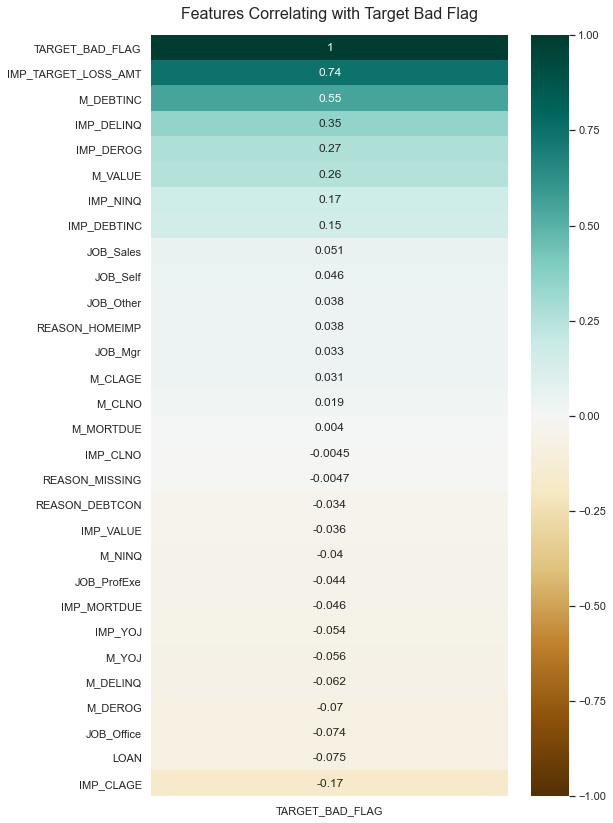

In [70]:
plt.figure(figsize=(8, 14))
heatmap = sns.heatmap(df.corr()[['TARGET_BAD_FLAG']].sort_values(by='TARGET_BAD_FLAG', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Target Bad Flag', fontdict={'fontsize':16}, pad=16);

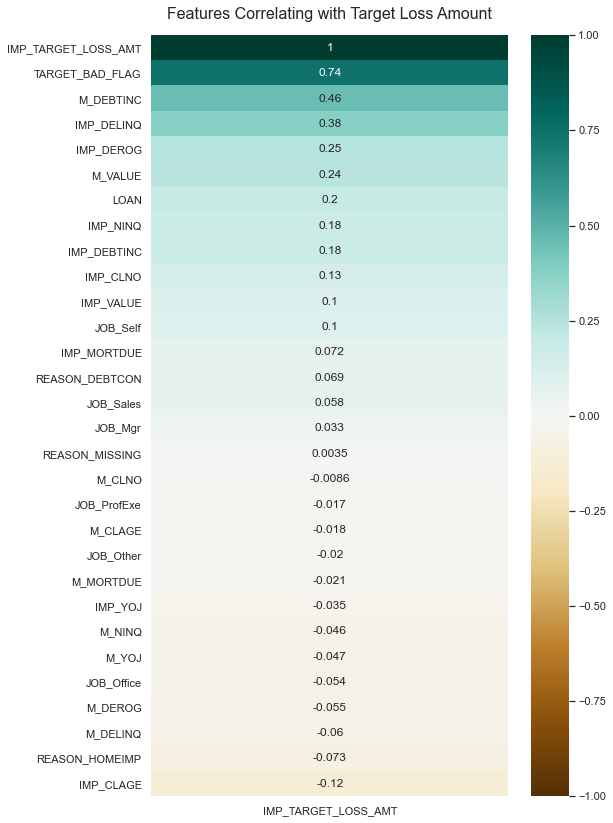

In [71]:
plt.figure(figsize=(8, 14))
heatmap = sns.heatmap(df.corr()[['IMP_TARGET_LOSS_AMT']].sort_values(by='IMP_TARGET_LOSS_AMT', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Target Loss Amount', fontdict={'fontsize':16}, pad=16);